<a href="https://colab.research.google.com/github/dandersonlittle/testbinder/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("tidyverse")
library(dplyr)
library(haven)
install.packages("knitr")
library(knitr)




Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tidyr)

In [6]:
## Read in data
raw_data <- read_sas("wvs_dataset.sas7bdat")



In [7]:
wvs <- as.data.frame(raw_data)

wvs <-
  wvs %>%
  mutate(trust = if_else(A165 == 1,1,0), trust = replace(trust, A165 < 1, NA),
         inc=X047CS, inc = replace(inc, inc < 1, NA),
         inc = if_else(X047CS >= 840001 & X047CS <= 840010, X047CS-840000 ,inc),
         inc = if_else(X047CS >= 840011 & X047CS <= 840020, X047CS-840010 ,inc),
         inc = if_else(X047CS >= 840041 & X047CS <= 840050, X047CS-840040 ,inc),
         inc = if_else(X047CS >= 840051 & X047CS <= 840060, X047CS-840050 ,inc),
         hinc = if_else(inc >= 8,1,0),
         happy = case_when(
           A008 == 1 ~ 4,
           A008 == 2 ~ 3,
           A008 == 3 ~ 2,
           A008 == 4 ~ 1,
           TRUE ~ NA_integer_),
         hard_work = A030,
         thrift = A038,
         good_pay = C011,
         low_pressure = C012,
         job_security = C013,
         respected_job = C014,
         good_hours = C015,
         init_opp = C016,
         generous_hol = C017,
         achieve_something = C018,
         responsible_job = C019,
         interesting_job = C020,
         meets_abilities = C021,
         competition_good = case_when(
           E039 == 1 ~ 10,
           E039 == 2 ~ 9,
           E039 == 3 ~ 8,
           E039 == 4 ~ 7,
           E039 == 5 ~ 6,
           E039 == 6 ~ 5,
           E039 == 7 ~ 4,
           E039 == 8 ~ 3,
           E039 == 9 ~ 2,
           E039 == 10 ~ 1,
           TRUE ~ NA_integer_),
         major_change = E045,
         political_party = case_when(
           E179 == 840001 ~ 1,
           E179 == 840002 ~ 2,
           E179 == 840003 ~ 3,
           E179 == 840005 ~ 4,
           E179 == 5 ~ 5
         ),
         sex = X001,
         age = X003,
         marital_status = X007,
         ed_level = X025,
         emp_status = X028


           ) %>%
  select(year, S003, trust, inc, hinc, happy, hard_work, thrift, good_pay,
         low_pressure, job_security, respected_job, good_hours, init_opp,
         generous_hol, achieve_something, responsible_job, interesting_job,
         meets_abilities, competition_good, major_change, political_party, sex,
         age, marital_status, ed_level, emp_status)

summary(wvs)
#view(wvs)

averages_by_sex <- wvs %>%
  group_by(sex) %>%
  summarize(across(everything(), ~ mean(., na.rm = TRUE)))

transposed_averages <- t(averages_by_sex)
formatted_transposed <- format(transposed_averages, scientific = FALSE, digits =2)
#print(formatted_transposed)
colnames(formatted_transposed) <- c("Male", "Female")

#print(averages_by_sex)
print(formatted_transposed)
# print(averages_by_sex)
table_markdown <- kable(formatted_transposed, format = "markdown")
#print(table_markdown)

      year           S003         trust             inc             hinc       
 Min.   :1999   Min.   :840   Min.   :0.0000   Min.   : 1.00   Min.   :0.0000  
 1st Qu.:1999   1st Qu.:840   1st Qu.:0.0000   1st Qu.: 3.00   1st Qu.:0.0000  
 Median :2004   Median :840   Median :0.0000   Median : 6.00   Median :0.0000  
 Mean   :2003   Mean   :840   Mean   :0.3718   Mean   : 5.69   Mean   :0.3104  
 3rd Qu.:2006   3rd Qu.:840   3rd Qu.:1.0000   3rd Qu.: 8.00   3rd Qu.:1.0000  
 Max.   :2006   Max.   :840   Max.   :1.0000   Max.   :10.00   Max.   :1.0000  
                              NA's   :51       NA's   :234     NA's   :234     
     happy        hard_work          thrift          good_pay     
 Min.   :1.00   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:3.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :3.00   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :3.34   Mean   :0.5783   Mean   :0.2736   Mean   :0.8541  
 3rd Qu.:4.00   3rd Qu.:1

                  Male      Female   
sex               "   1.00" "   2.00"
year              "2002.64" "2002.74"
S003              " 840.00" " 840.00"
trust             "   0.36" "   0.38"
inc               "   5.88" "   5.51"
hinc              "   0.33" "   0.29"
happy             "   3.33" "   3.35"
hard_work         "   0.65" "   0.52"
thrift            "   0.29" "   0.26"
good_pay          "   0.87" "   0.84"
low_pressure      "   0.33" "   0.38"
job_security      "   0.74" "   0.72"
respected_job     "   0.40" "   0.44"
good_hours        "   0.53" "   0.62"
init_opp          "   0.58" "   0.54"
generous_hol      "   0.29" "   0.32"
achieve_something "   0.76" "   0.79"
responsible_job   "   0.53" "   0.51"
interesting_job   "   0.78" "   0.75"
meets_abilities   "   0.56" "   0.60"
competition_good  "   7.87" "   7.46"
major_change      "   5.95" "   5.76"
political_party   "   1.90" "   1.94"
age               "  46.48" "  46.40"
marital_status    "   2.56" "   2.64"
ed_level    

In [58]:
# Create a vector of variable names
variable_names <- c("happy", "thrift", "good_pay", "trust", "hard_work",
  "low_pressure", "job_security", "respected_job", "good_hours", "init_opp",
  "generous_hol", "achieve_something", "responsible_job", "interesting_job",
  "meets_abilities", "competition_good", "major_change", "political_party",
  "age", "marital_status", "ed_level", "emp_status")

data_subset <- wvs %>%
  select(inc, all_of(variable_names))

# Create an empty vector to store R-squared values
r_squared_values <- c()

for (variable in variable_names) {
  # Create a formula for the regression
  formula <- as.formula(paste("inc ~", variable))

  # Fit the linear regression model
  model <- lm(formula, data = data_subset)

  # Extract the R-squared value (can be adjusted or not based on your choice)
  r_squared <- summary(model)$adj.r.squared

  # Append the variable name and R-squared value to the vectors
  r_squared_values <- c(r_squared_values, r_squared)
}
print(r_squared_values)

# Create a dataframe with variable names and R-squared values
r_squared_df <- data.frame(Variable = variable_names, R_Squared = r_squared_values)
# Rank variables based on R-squared values
ranked_variables <- r_squared_df[order(-r_squared_df$R_Squared), ]
print(ranked_variables)

# Select the top three variables
top_variables <- ranked_variables[1:3, ]

# Extract the variable names as a character vector
top_variable_names <- as.character(top_variables$Variable)

# Create a new dataframe containing only the top three variables from your original dataframe
selected_data <- data_subset[, c("inc", top_variable_names)]
#print(selected_data)

# Create a formula for the regression
formula <- inc ~ ed_level + marital_status + init_opp

# Fit the multiple linear regression model
model <- lm(formula, data = selected_data)

# Print the summary of the regression model
summary(model)


 [1]  9.514012e-03 -2.658126e-04  9.727184e-05  8.921647e-03  2.610070e-04
 [6]  3.195750e-03  1.166680e-03  3.660216e-03  1.458828e-02  2.258059e-02
[11]  7.096544e-05  3.868331e-03  4.654375e-03  3.404326e-03  4.866229e-04
[16]  9.799345e-03  9.662496e-03  7.994821e-03  7.043272e-04  3.803542e-02
[21]  7.642219e-02  1.962458e-02
            Variable     R_Squared
21          ed_level  7.642219e-02
20    marital_status  3.803542e-02
10          init_opp  2.258059e-02
22        emp_status  1.962458e-02
9         good_hours  1.458828e-02
16  competition_good  9.799345e-03
17      major_change  9.662496e-03
1              happy  9.514012e-03
4              trust  8.921647e-03
18   political_party  7.994821e-03
13   responsible_job  4.654375e-03
12 achieve_something  3.868331e-03
8      respected_job  3.660216e-03
14   interesting_job  3.404326e-03
6       low_pressure  3.195750e-03
7       job_security  1.166680e-03
19               age  7.043272e-04
15   meets_abilities  4.866229e-04
5 


Call:
lm(formula = formula, data = selected_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3316 -1.7034  0.0367  1.7488  6.6043 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     4.74024    0.14190  33.405  < 2e-16 ***
ed_level        0.37179    0.02143  17.346  < 2e-16 ***
marital_status -0.34801    0.02261 -15.395  < 2e-16 ***
init_opp        0.33682    0.09540   3.531 0.000422 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.302 on 2493 degrees of freedom
  (1494 observations deleted due to missingness)
Multiple R-squared:  0.2066,	Adjusted R-squared:  0.2057 
F-statistic: 216.4 on 3 and 2493 DF,  p-value: < 2.2e-16


Based on the linear regression results you've provided, here's an evaluation of the model and its implications:

Coefficients: The coefficients for the independent variables are as follows:

Intercept: 4.74024
Education Level (ed_level): 0.37179
Marital Status (marital_status): -0.34801
Opportunity to Initiate Projects at Work (init_opp): 0.33682
These coefficients represent the estimated changes in income associated with a one-unit change in each respective independent variable while holding the other variables constant.

Significance: All coefficients are statistically significant with p-values < 0.001, indicating that these variables have a significant impact on income in the context of your model.

R-squared: The adjusted R-squared value is 0.2057, which means that approximately 20.57% of the variance in income is explained by the combination of education level, marital status, and opportunity to initiate projects at work in your model.

Residuals: The residuals (differences between the observed and predicted values) appear to be reasonably distributed with no obvious patterns, suggesting that the assumptions of linear regression, such as constant variance and normality of errors, are met.

Sample Size: You mentioned that the dataset contains 4,000 rows, which is a reasonably large sample size. This can enhance the reliability of your regression results.

Scatter Plot: You mentioned that income is evenly distributed across the scatter plot, suggesting that there may not be a strong linear relationship between the independent variables and income. The R-squared value of 0.2057 confirms that the relationship is weak, explaining only a relatively small portion of the variance in income.

Interpretation: Based on the coefficients:

Education level (positive coefficient): An increase in education level is associated with a positive change in income, holding other variables constant.
Marital status (negative coefficient): Being married is associated with a decrease in income, holding other variables constant.
Opportunity to initiate projects at work (positive coefficient): Having more opportunities to initiate projects at work is associated with a positive change in income, holding other variables constant.
It's important to note that while the model is statistically significant, the adjusted R-squared value indicates that these three variables explain only a relatively small portion of the variability in income. This suggests that there are other factors not included in the model that also influence income.

Additionally, correlation or causation between variables cannot be inferred solely from regression results. Interpretation should consider the context of the data and the research question.

In conclusion, your model provides insights into the relationships between these variables and income, but the overall explanatory power of the model is limited. It's essential to interpret these results within the broader context of your research and consider other potential factors that may influence income.



Call:
lm(formula = inc ~ ed_level, data = data_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7419 -2.2154  0.0213  2.2581  5.5479 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.68888    0.12144   30.38   <2e-16 ***
ed_level     0.38163    0.02163   17.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.65 on 3748 degrees of freedom
  (241 observations deleted due to missingness)
Multiple R-squared:  0.07667,	Adjusted R-squared:  0.07642 
F-statistic: 311.2 on 1 and 3748 DF,  p-value: < 2.2e-16


Warning message:
“Removed 241 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 241 rows containing missing values (`geom_point()`).”


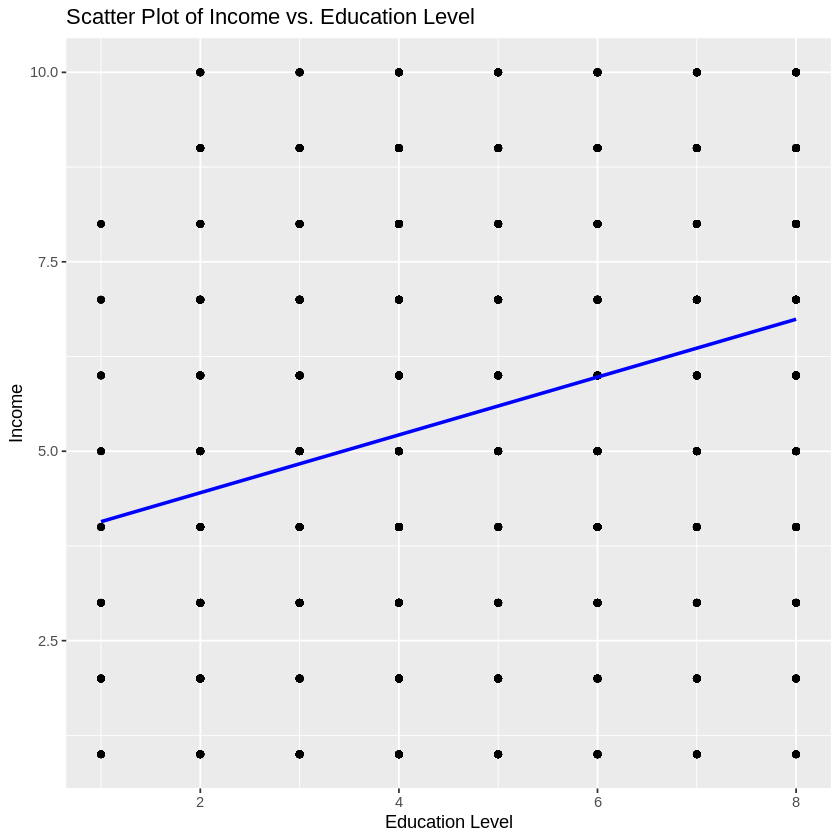

In [59]:

# Create a subset of your data with only the relevant columns
data_subset <- wvs %>%
  select(inc, ed_level)  # Replace "your_data" with the actual name of your dataset

# Run the linear regression
regression_model <- lm(inc ~ ed_level, data = data_subset)

# Summarize the regression results
summary(regression_model)
library(ggplot2)

# Create a scatter plot
scatter_plot <- ggplot(data = data_subset, aes(x = ed_level, y = inc)) +
  geom_point() +  # Add points
  labs(title = "Scatter Plot of Income vs. Education Level",
       x = "Education Level",
       y = "Income")

# Create a line representing the regression line
line_plot <- geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue")

# Combine the scatter plot and line plot
final_plot <- scatter_plot + line_plot

# Print the combined plot
print(final_plot)


Warning message:
“The dot-dot notation (`..n..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(n)` instead.”
Warning message:
“Removed 241 rows containing non-finite values (`stat_sum()`).”
Warning message:
“Removed 241 rows containing non-finite values (`stat_smooth()`).”


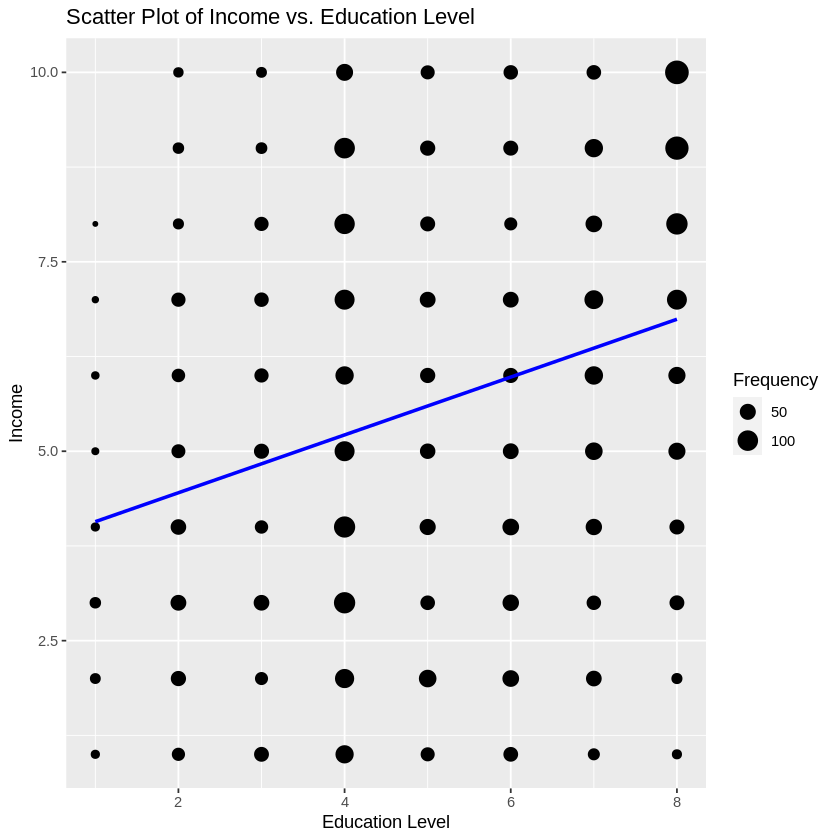

In [60]:
# Create a scatter plot with weighted data points
scatter_plot <- ggplot(data = data_subset, aes(x = ed_level, y = inc)) +
  geom_count(aes(size = ..n..)) +  # Use geom_count to adjust point size based on frequency
  labs(title = "Scatter Plot of Income vs. Education Level",
       x = "Education Level",
       y = "Income") +
  scale_size_continuous(name = "Frequency")  # Add a legend for point size

# Create a line representing the regression line
line_plot <- geom_smooth(method = "lm", formula = y ~ x, se = FALSE, color = "blue")

# Combine the scatter plot and line plot
final_plot <- scatter_plot + line_plot

# Print the combined plot
print(final_plot)

## Avereages of all variables across male & female respondents
Output from previous cell copied by hand


|                  |Male      |Female    |
|:-----------------|:---------|:---------|
|sex               |1.00      |2.00      |
|year              |2002.64   |2002.74   |
|S003              |840.00    |840.00    |
|trust             |0.36      |0.38      |
|X047CS            |518488.29 |543852.26 |
|inc               |5.88      |5.51      |
|hinc              |0.33      |0.29      |
|happy             |3.33      |3.35      |
|hard_work         |0.65      |0.52      |
|thrift            |0.29      |0.26      |
|good_pay          |0.87      |0.84      |
|low_pressure      |0.33      |0.38      |
|job_security      |0.74      |0.72      |
|respected_job     |0.40      |0.44      |
|good_hours        |0.53      |0.62      |
|init_opp          |0.58      |0.54      |
|generous_hol      |0.29      |0.32      |
|achieve_something |0.76      |0.79      |
|responsible_job   |0.53      |0.51      |
|interesting_job   |0.78      |0.75      |
|meets_abilities   |0.56      |0.60      |
|competition_good  |7.87      |7.46      |
|major_change      |5.95      |5.76      |
|political_party   |1.90      |1.94      |
|age               |46.48     |46.40     |
|marital_status    |2.56      |2.64      |
|ed_level          |5.27      |5.20      |
|emp_status        |2.53      |3.10      |

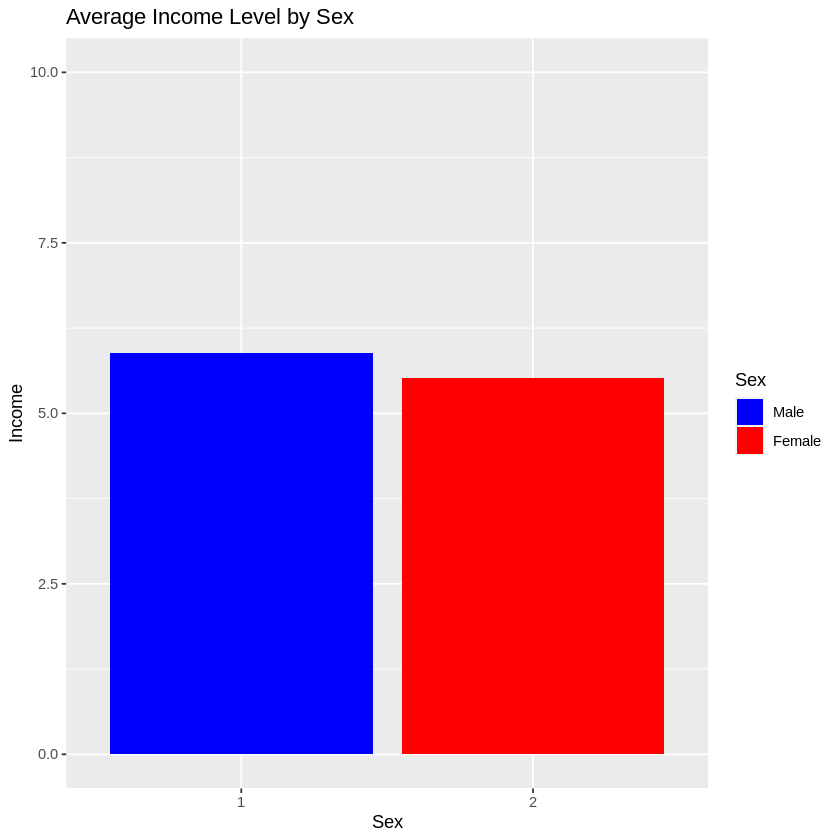

In [21]:
#print(averages_by_sex)
ggplot(averages_by_sex, aes(x = factor(sex), y = inc, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Average Income Level by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 10)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


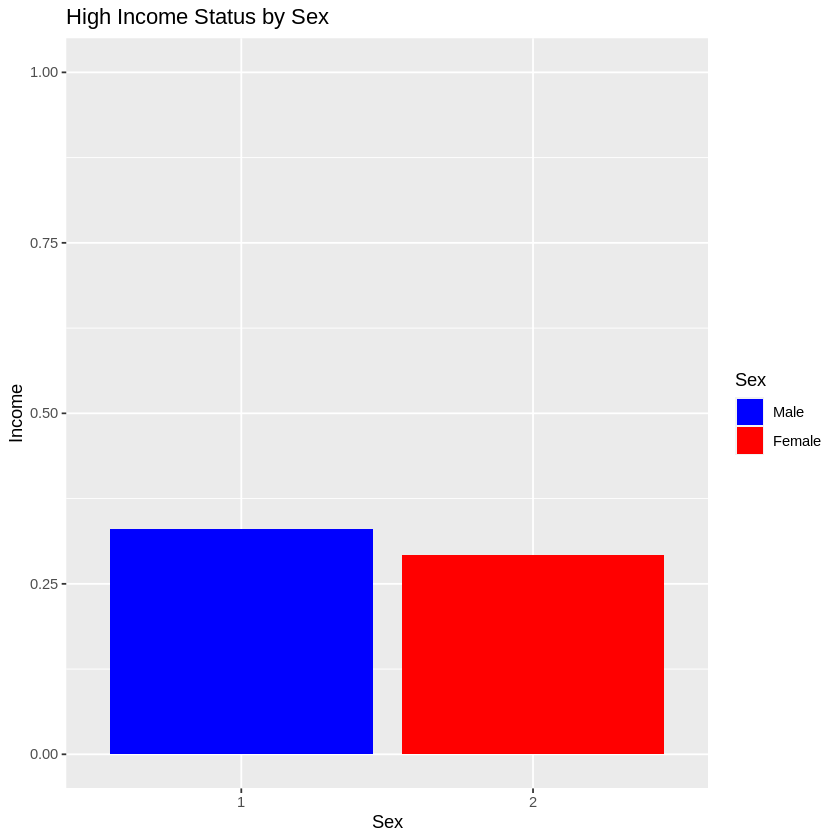

In [20]:
ggplot(averages_by_sex, aes(x = factor(sex), y = hinc, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "High Income Status by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


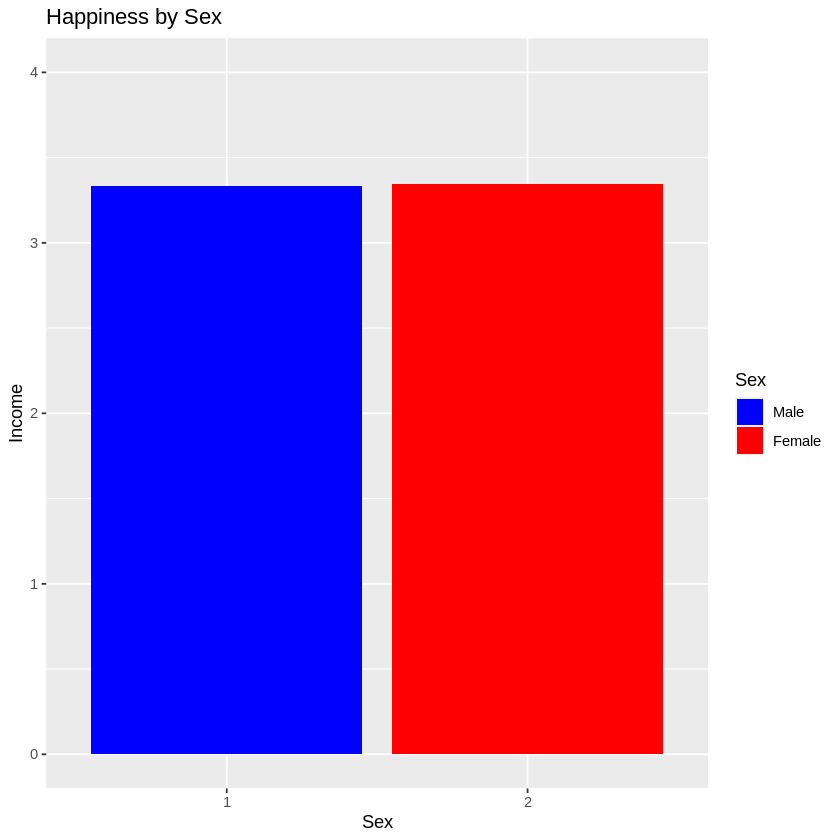

In [16]:
ggplot(averages_by_sex, aes(x = factor(sex), y = happy, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Happiness by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 4)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


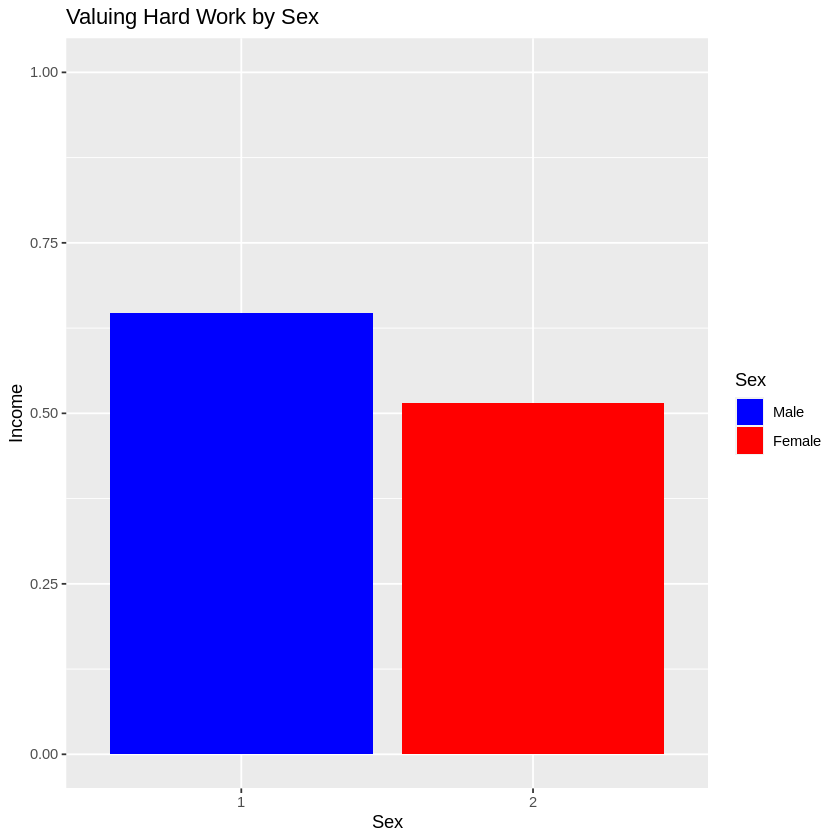

In [17]:
ggplot(averages_by_sex, aes(x = factor(sex), y = hard_work, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing Hard Work by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


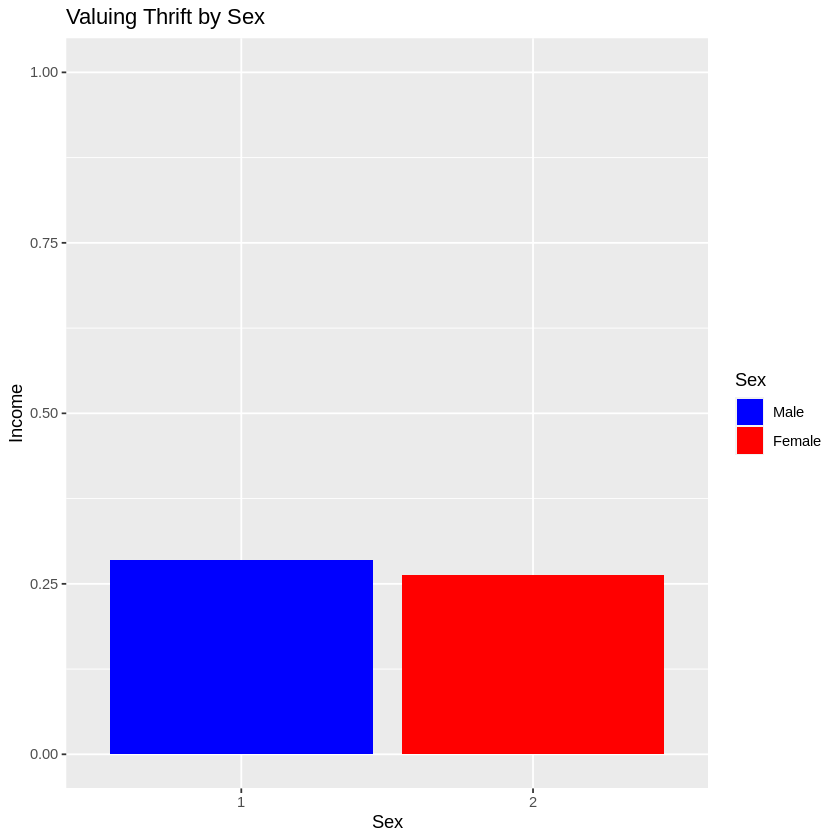

In [18]:
ggplot(averages_by_sex, aes(x = factor(sex), y = thrift, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing Thrift by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


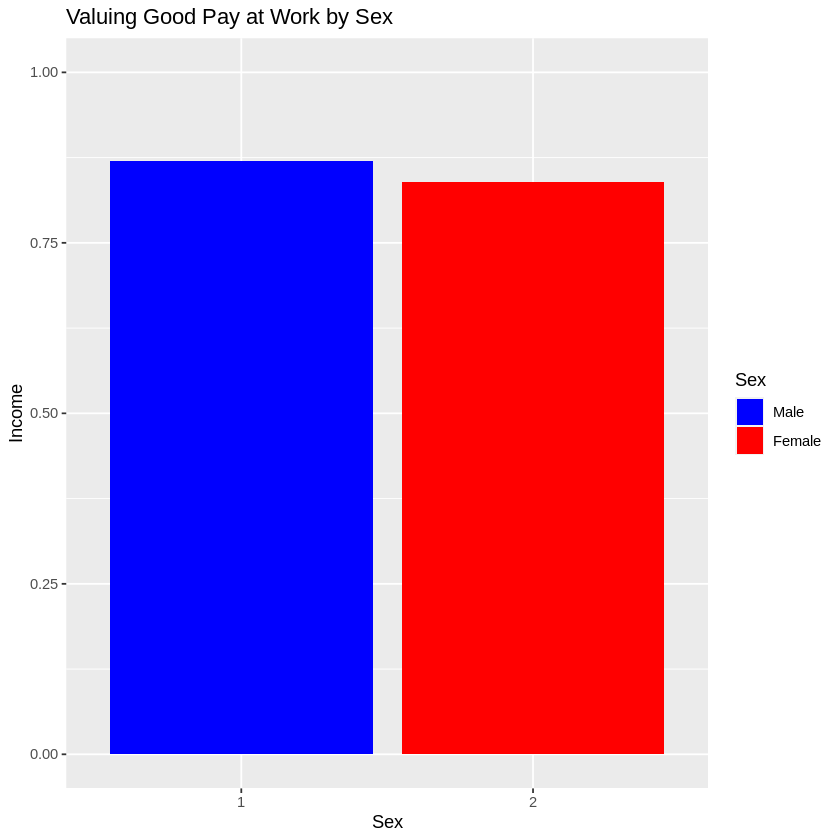

In [29]:
ggplot(averages_by_sex, aes(x = factor(sex), y = good_pay, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing Good Pay at Work by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


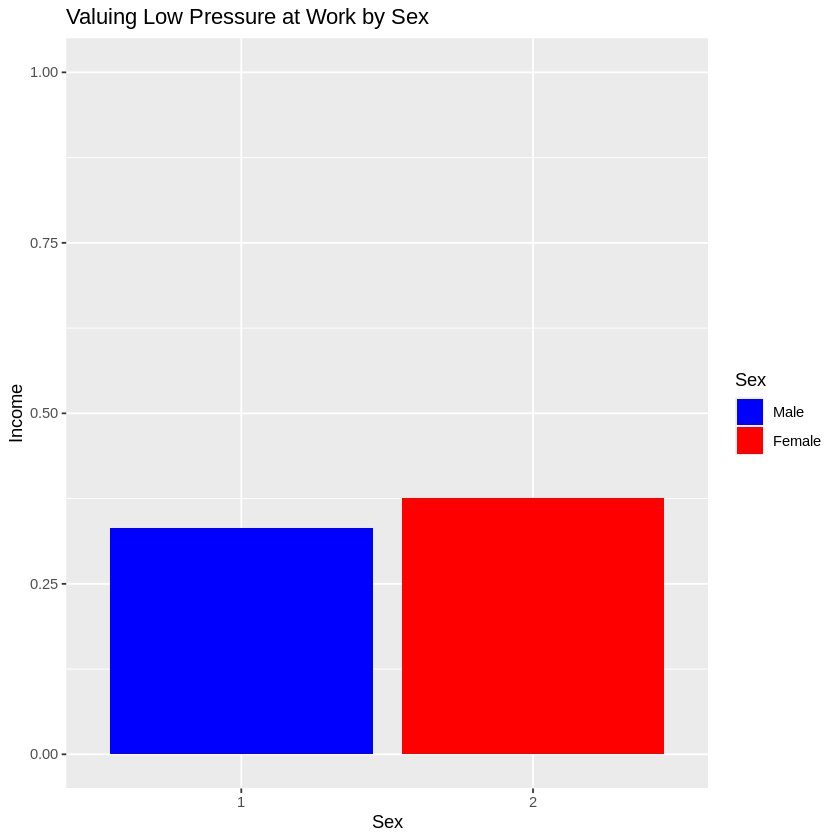

In [28]:
ggplot(averages_by_sex, aes(x = factor(sex), y = low_pressure, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing Low Pressure at Work by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


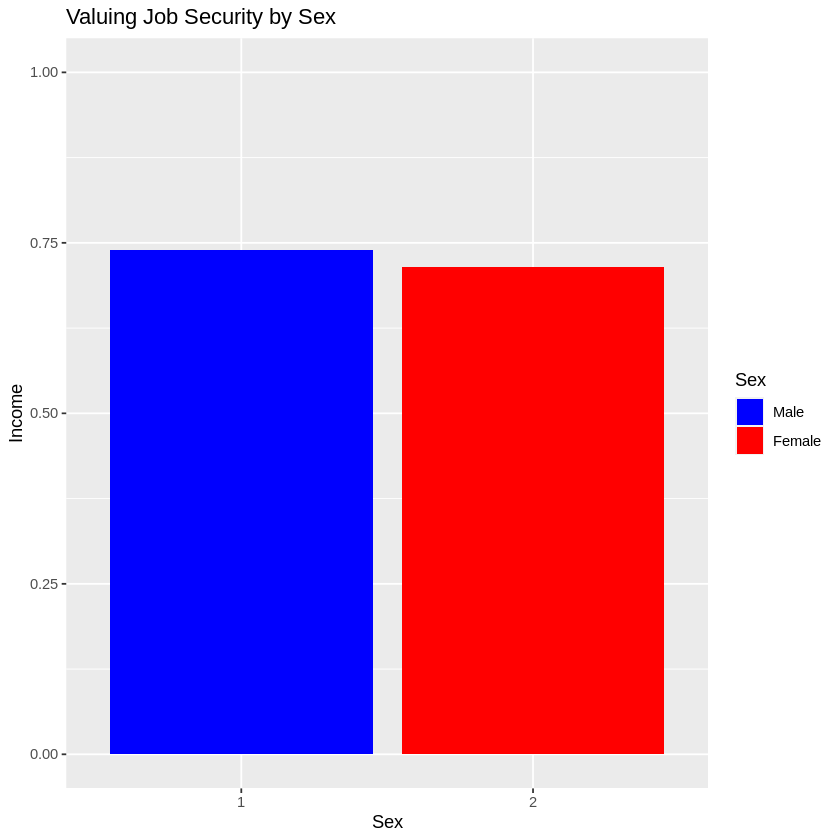

In [23]:
ggplot(averages_by_sex, aes(x = factor(sex), y = job_security, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing Job Security by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


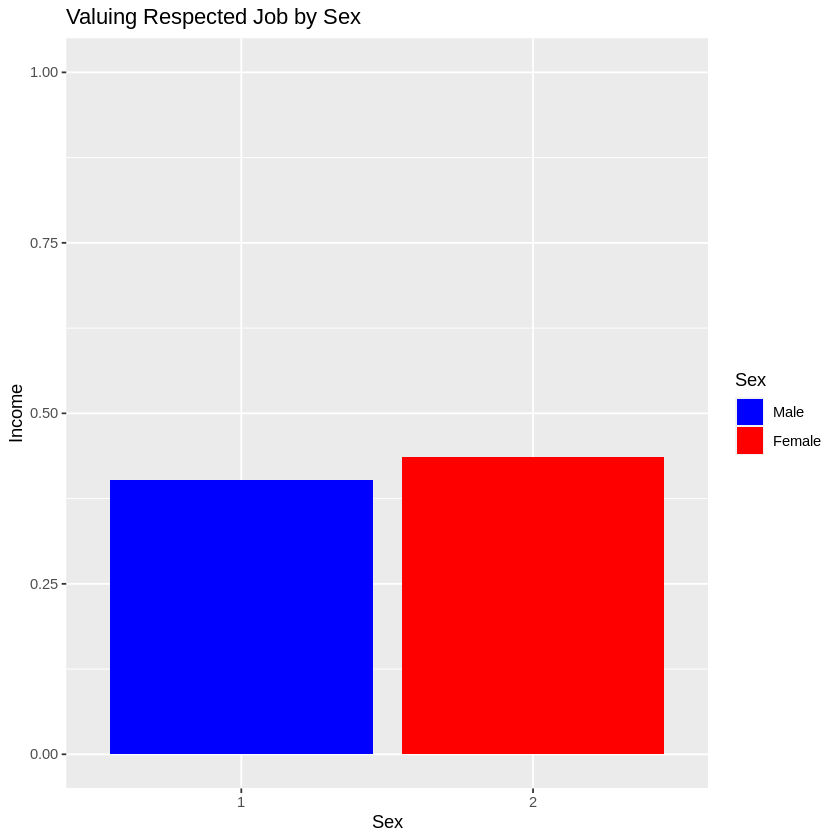

In [24]:
ggplot(averages_by_sex, aes(x = factor(sex), y = respected_job, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing Respected Job by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


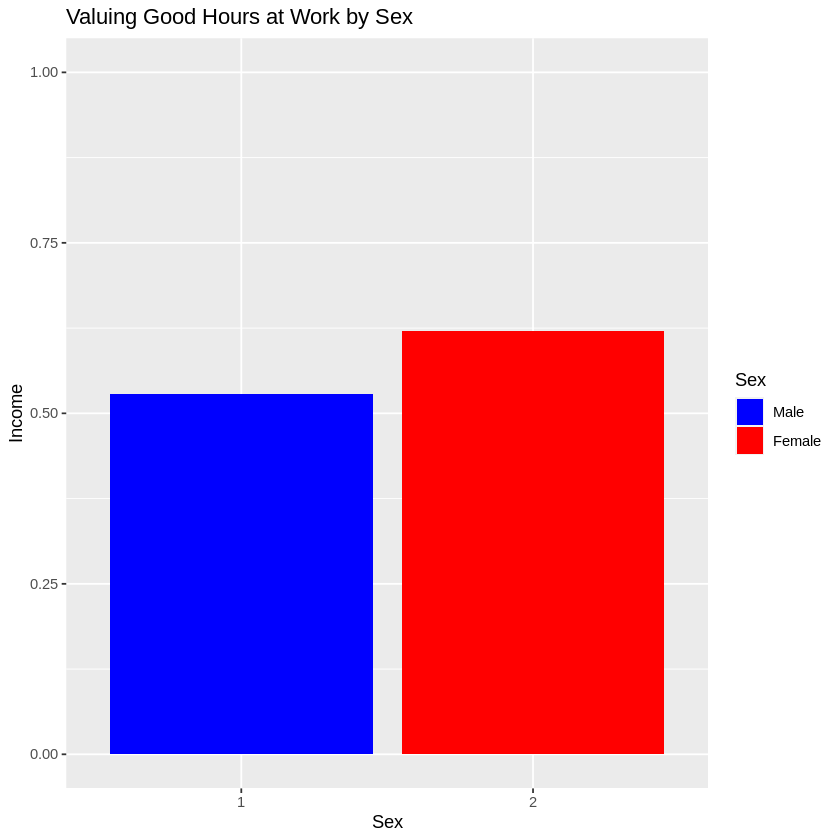

In [27]:
ggplot(averages_by_sex, aes(x = factor(sex), y = good_hours, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing Good Hours at Work by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


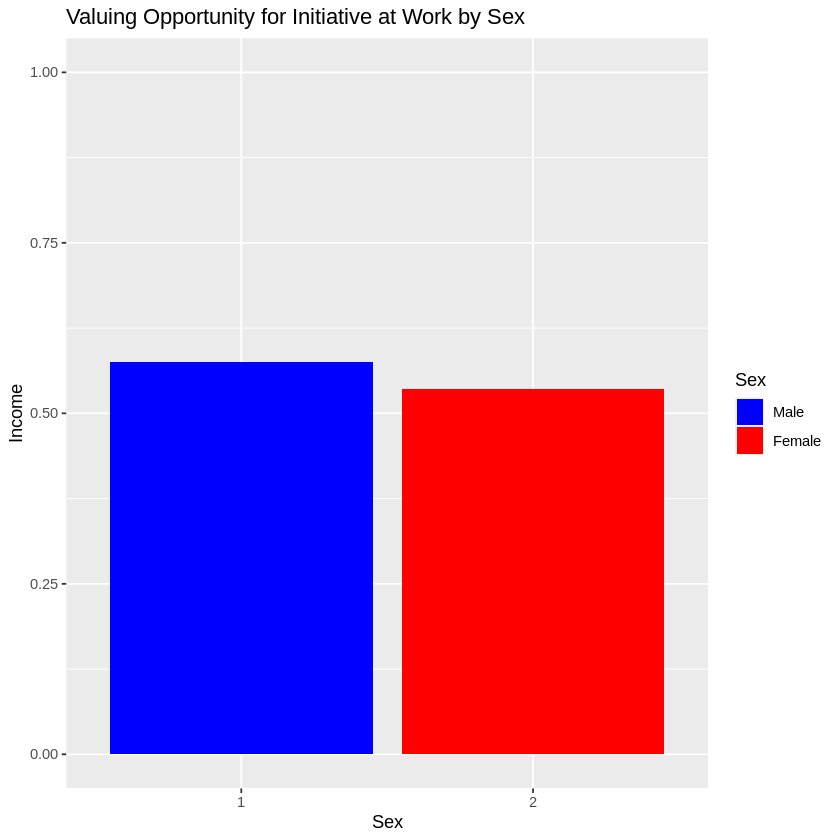

In [26]:
ggplot(averages_by_sex, aes(x = factor(sex), y = init_opp, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing Opportunity for Initiative at Work by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


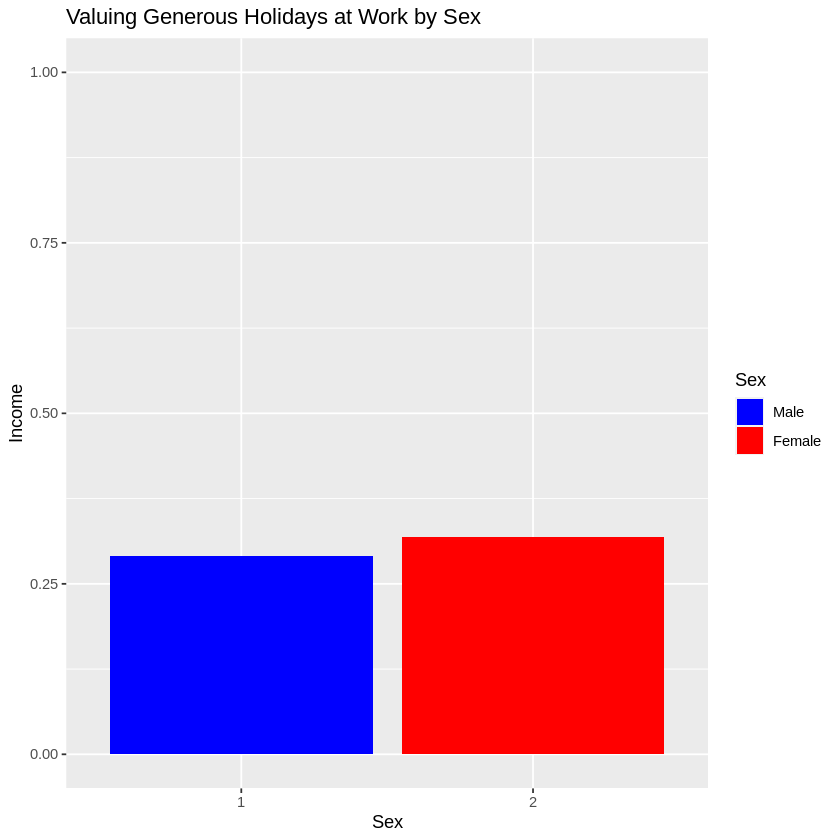

In [30]:
ggplot(averages_by_sex, aes(x = factor(sex), y = generous_hol, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing Generous Holidays at Work by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


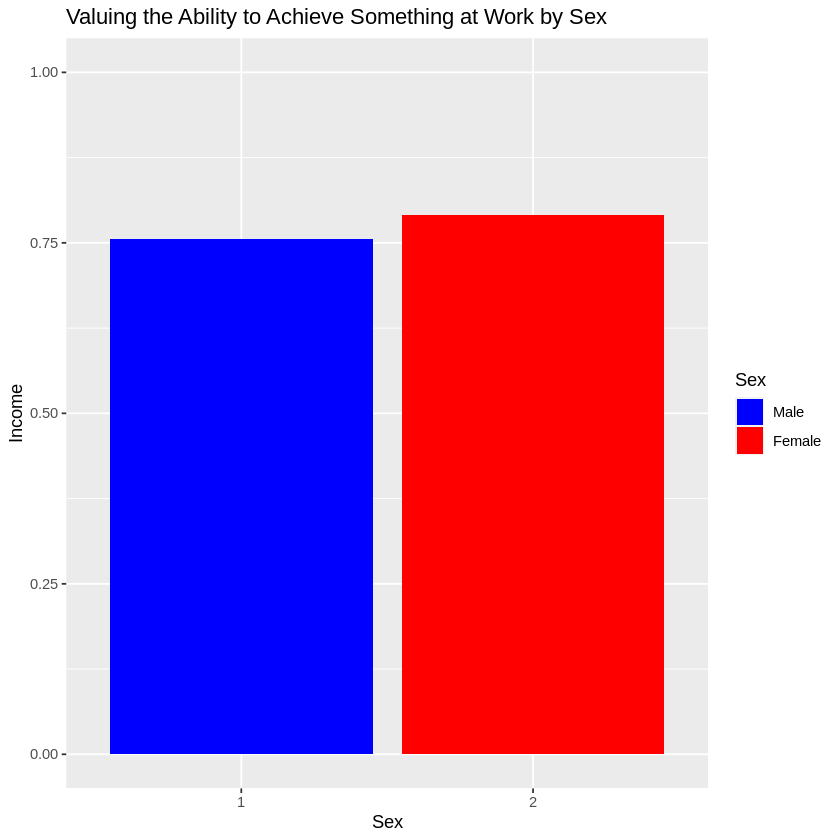

In [31]:
ggplot(averages_by_sex, aes(x = factor(sex), y = achieve_something, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing the Ability to Achieve Something at Work by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


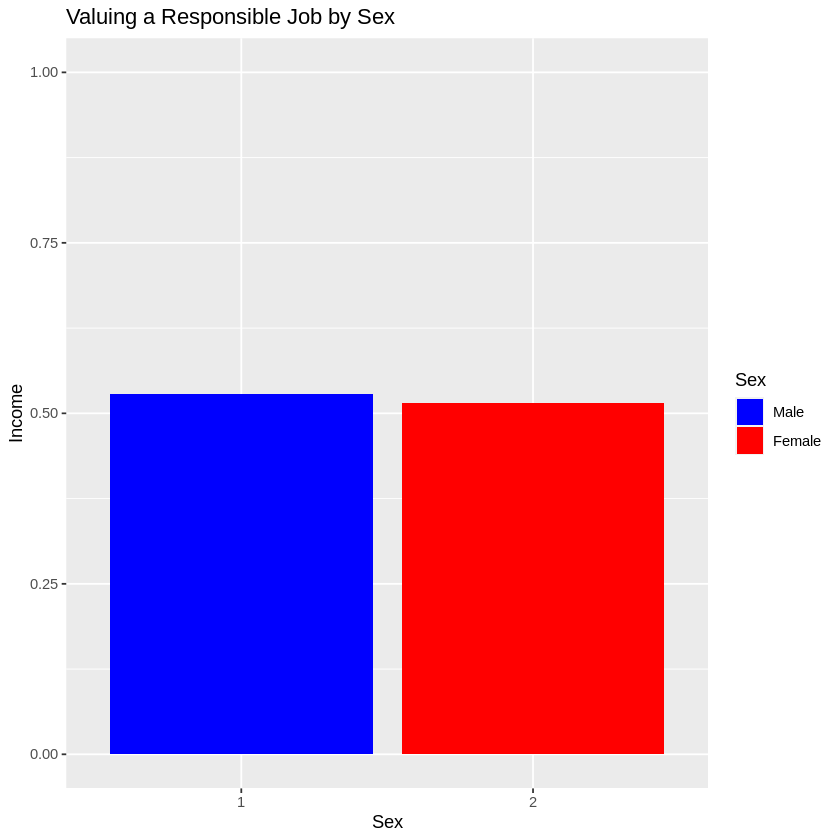

In [32]:
ggplot(averages_by_sex, aes(x = factor(sex), y = responsible_job, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing a Responsible Job by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


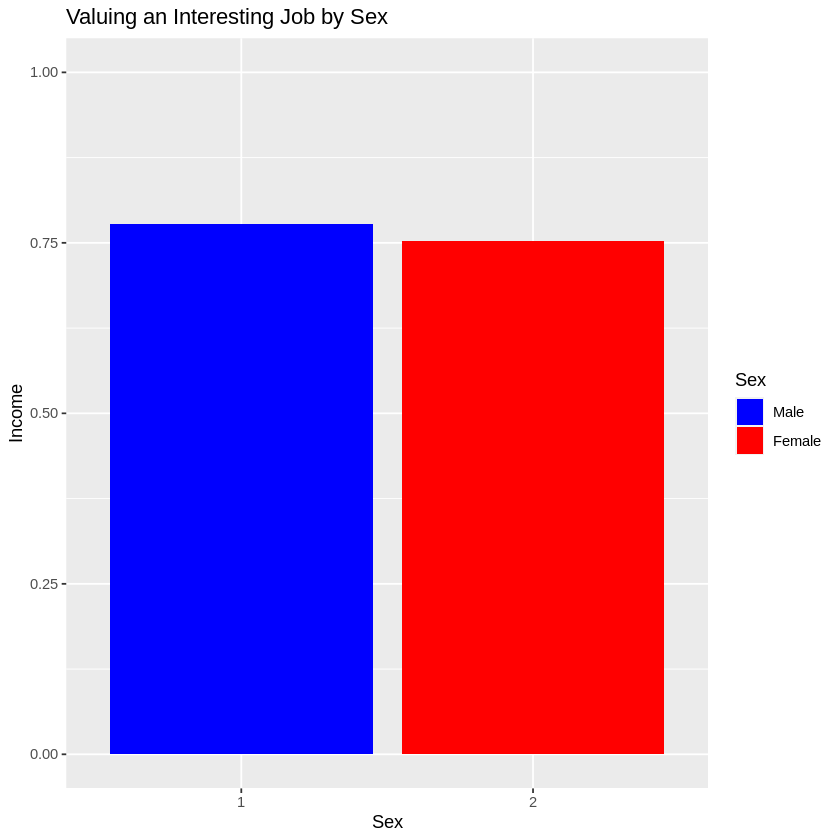

In [33]:
ggplot(averages_by_sex, aes(x = factor(sex), y = interesting_job, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing an Interesting Job by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


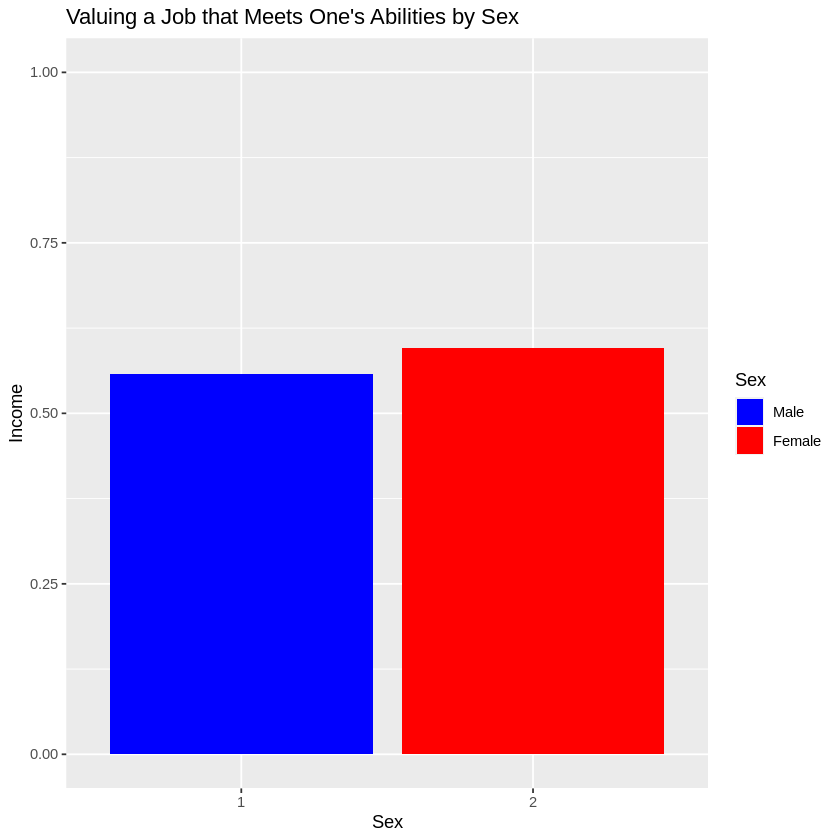

In [34]:
ggplot(averages_by_sex, aes(x = factor(sex), y = meets_abilities, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Valuing a Job that Meets One's Abilities by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 1)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


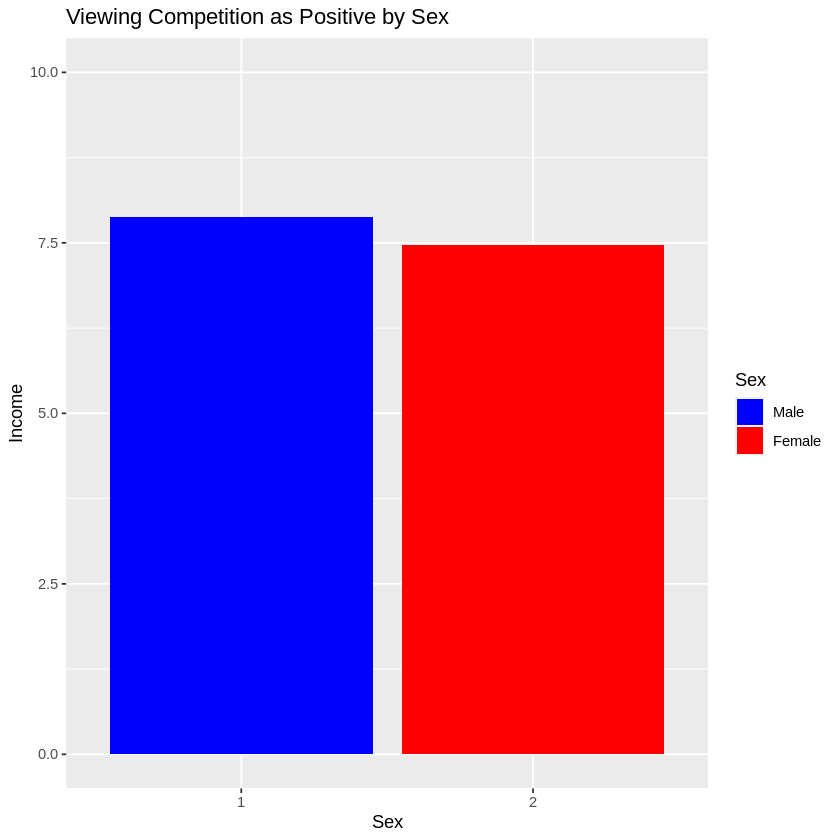

In [35]:
ggplot(averages_by_sex, aes(x = factor(sex), y = competition_good, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Viewing Competition as Positive by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 10)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


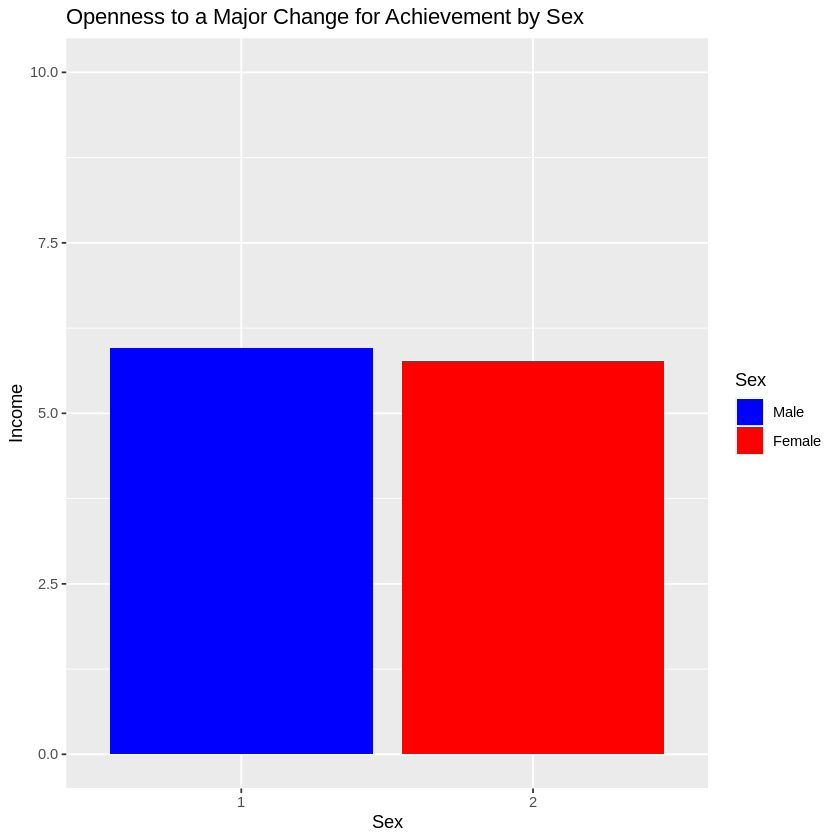

In [36]:
ggplot(averages_by_sex, aes(x = factor(sex), y = major_change, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Openness to a Major Change for Achievement by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 10)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


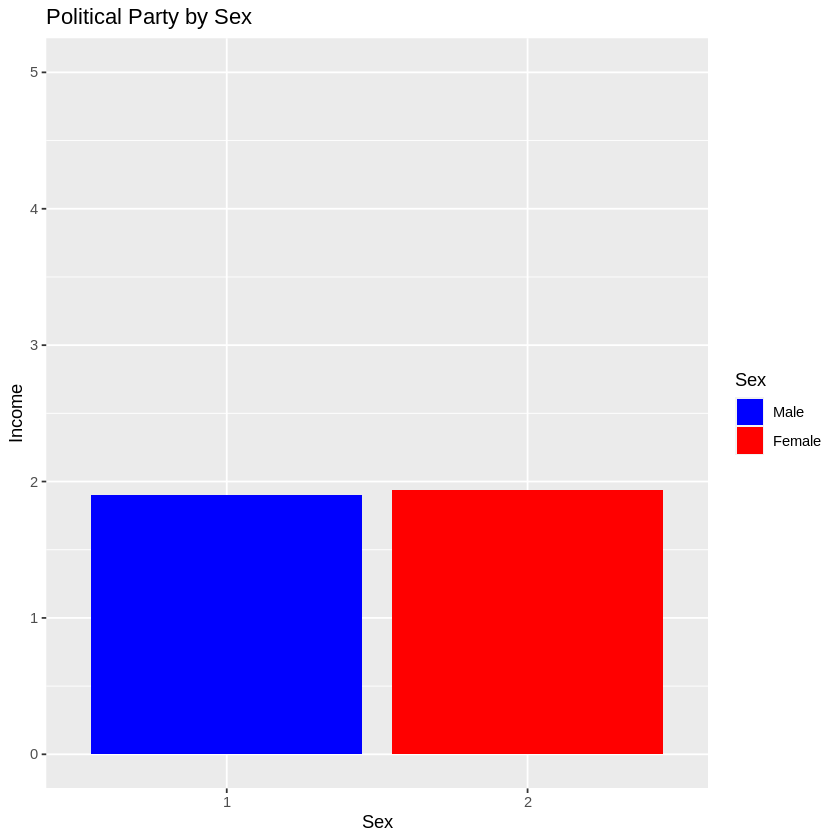

In [40]:
ggplot(averages_by_sex, aes(x = factor(sex), y = political_party, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Political Party by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 5)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


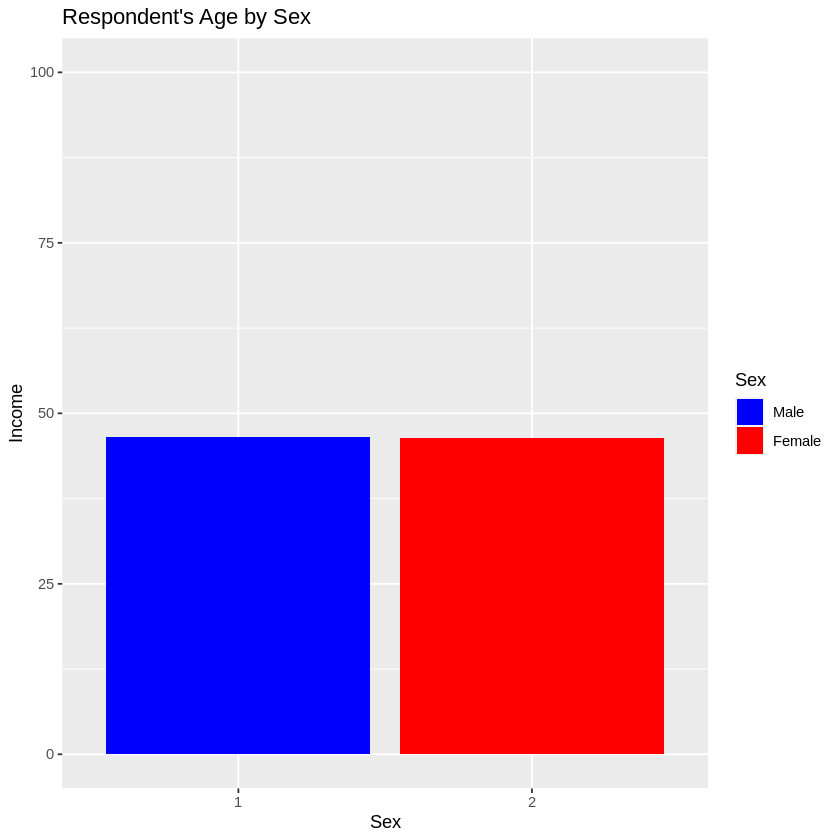

In [39]:
ggplot(averages_by_sex, aes(x = factor(sex), y = age, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Respondent's Age by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 100)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


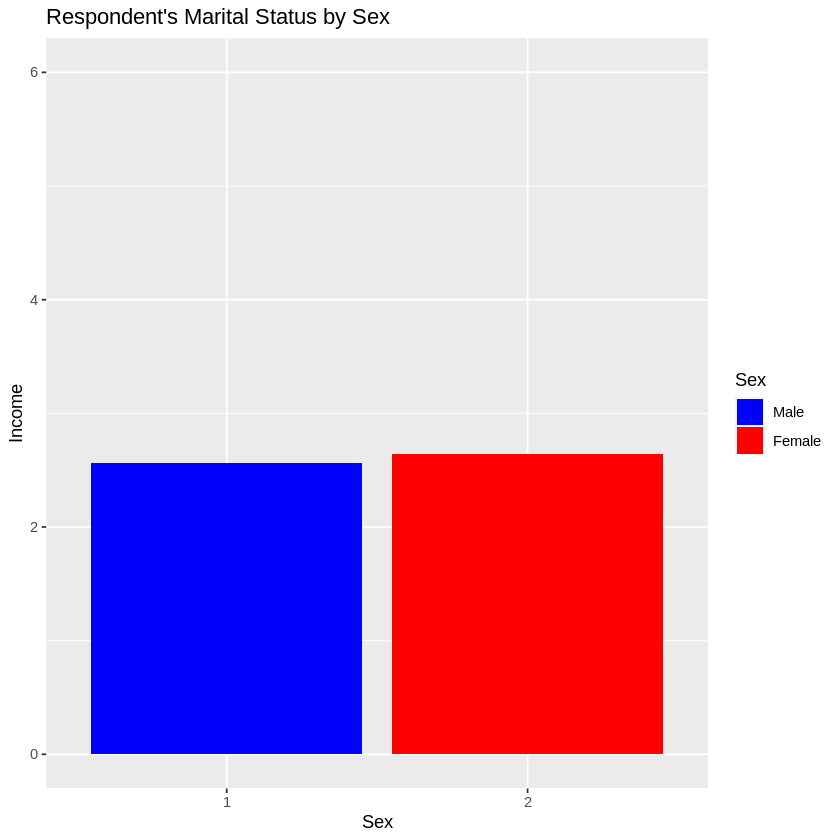

In [41]:
ggplot(averages_by_sex, aes(x = factor(sex), y = marital_status, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Respondent's Marital Status by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 6)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


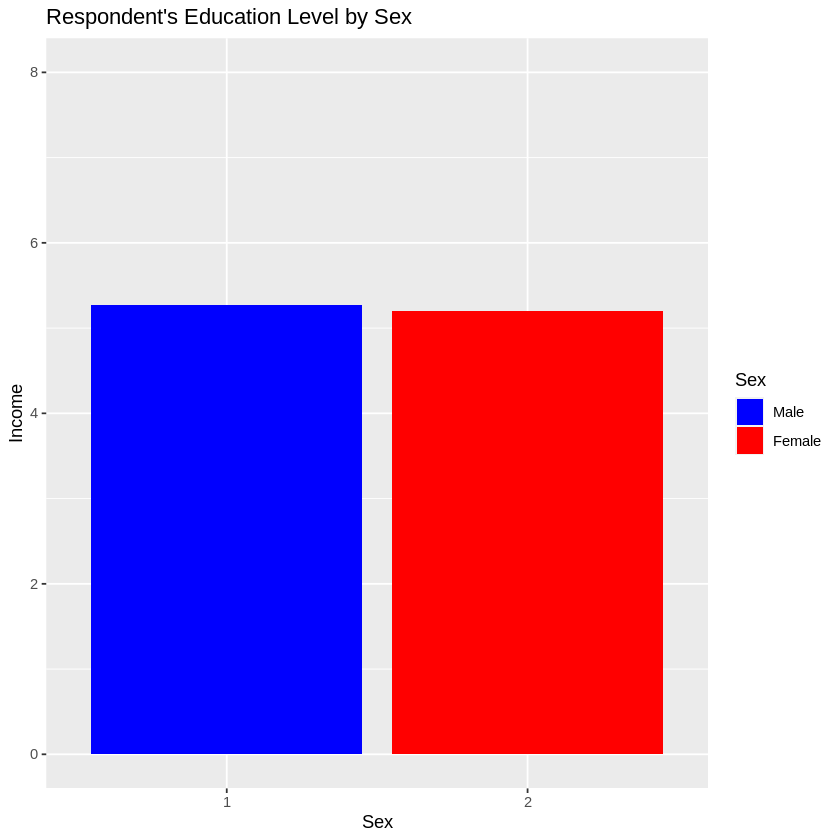

In [45]:
ggplot(averages_by_sex, aes(x = factor(sex), y = ed_level, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Respondent's Education Level by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 8)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))


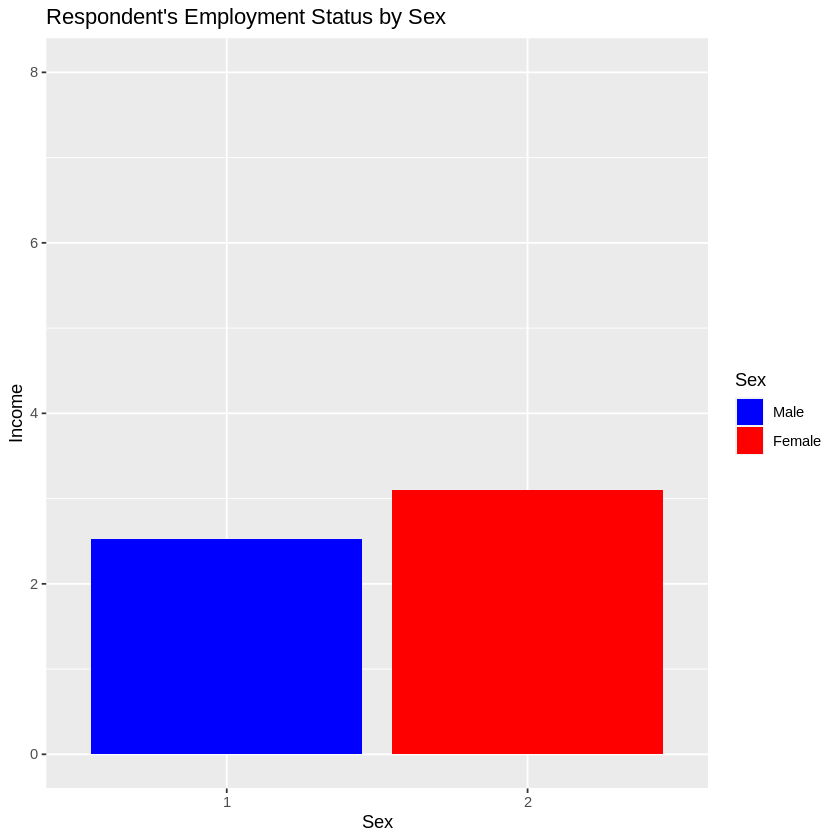

In [43]:
ggplot(averages_by_sex, aes(x = factor(sex), y = emp_status, fill = factor(sex))) +
  geom_bar(stat = "identity") +
  labs(title = "Respondent's Employment Status by Sex", x = "Sex", y = "Income") +
    coord_cartesian(ylim = c(0, 8)) +
    scale_fill_manual(values = c("1" = "blue", "2" = "red"),
                    name = "Sex",
                    labels = c("1" = "Male", "2" = "Female"))
